## Observations and Insights 

(1) Capomulin and Ramican were the most successful in decreasing tumor volume  
(2) For mouse s185 volume tumor volume decreased over the trial period and was treated with Capomulin
(3)There is a positive correlation between mouse weight and average tumor volume for mice treated with the Capomulin regimen

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset - merge on mouse ID with outer join
combined_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID',how='outer')
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
row_count = len(combined_df['Mouse ID'])
row_count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find duplicate mouse iD - 989 duplicate mouse + timepoint lines
duplicate_mouse_ids=combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop the duplicates - total = 1800
clean_mouse_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
row_count = len(clean_mouse_df['Mouse ID'])
row_count

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#create one group by variable to be more efficient 
drug_regimen = clean_mouse_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen.mean()['Tumor Volume (mm3)']
median = drug_regimen.median()['Tumor Volume (mm3)']
variance = drug_regimen.var()['Tumor Volume (mm3)']
std = drug_regimen.std()['Tumor Volume (mm3)']
sem = drug_regimen.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({'Mean':mean,
                         'Median':median,
                         'Variance':variance,
                         'Standard Deviation':std,
                         'SEM':sem
                        })
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary =drug_regimen.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
#create data set for charting - unique mice tested on  
chat_data = clean_mouse_df.groupby('Drug Regimen')['Mouse ID'].nunique()
chat_data

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

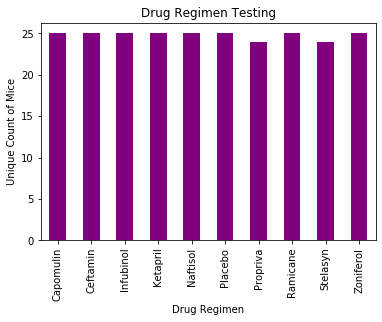

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
chat_data.plot(kind='bar', facecolor="purple")

#label charts
plt.title("Drug Regimen Testing")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Count of Mice")

plt.show()
plt.tight_layout()
plt.savefig('barchart_one')

In [12]:
import numpy as np

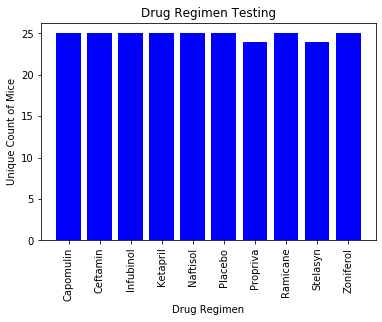

<Figure size 432x288 with 0 Axes>

In [119]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Create an arraw with the datapoints
users = [25 ,25, 25, 25, 25, 25, 24, 25, 24, 25]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(chat_data))

plt.bar(x_axis, users, color='b')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane', 'Stelasyn','Zoniferol'],rotation=90 )

plt.title("Drug Regimen Testing")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Count of Mice")

plt.show()
plt.tight_layout()
plt.savefig('barchart_two')



In [29]:

#groupby gender using mouse ID
groupby_gender = clean_mouse_df.groupby(["Sex"]).nunique()["Mouse ID"]
#create gender for labels
gender_index =list(groupby_gender.index)
groupby_gender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

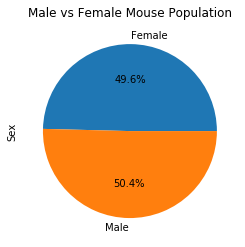

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender.plot(kind='pie',autopct="%1.1f%%")

#add labels and save
plt.legend
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()
plt.savefig('pie_one')

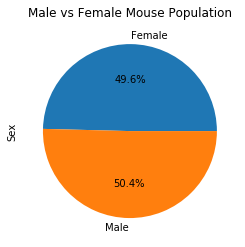

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create chart
plt.pie(groupby_gender,labels=gender_index, autopct="%1.1f%%")
#add labels and save
plt.legend
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()
plt.savefig('pie_two')

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#get the columns needs to find final tumor volume so we can later merge with orginal df and not have duplicate coloumns
tumor_vol_df =clean_mouse_df [["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_df = tumor_vol_df.sort_values(by="Timepoint",ascending=False).drop_duplicates(subset=["Mouse ID"], keep="first")

#keep only Capomulin, Ramicane, Infubinol, and Ceftamin
top_four = final_tumor_df[final_tumor_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_four

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
360,Capomulin,g316,45,40.159220
124,Capomulin,y793,45,31.896238
1855,Ceftamin,y865,45,64.729837
350,Capomulin,v923,45,40.658124
1379,Ceftamin,p438,45,61.433892
...,...,...,...,...
449,Ramicane,w678,5,43.166373
1743,Ceftamin,x226,0,45.000000
594,Ceftamin,b447,0,45.000000
1583,Ceftamin,u153,0,45.000000


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]



# Calculate the IQR and quantitatively determine if there are any potential outliers.
#find lower/upper quartiles to calculate IQR
quartiles = top_four['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


#Locate the rows which contain mice on each drug and get the tumor volumes - top four is a data frame with mice and final volume
# add subset 

    

The lower quartile of occupancy is: 37.187743802499995
The upper quartile of occupancy is: 59.930261755000004
The interquartile range of occupancy is: 22.74251795250001
The the median of occupancy is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


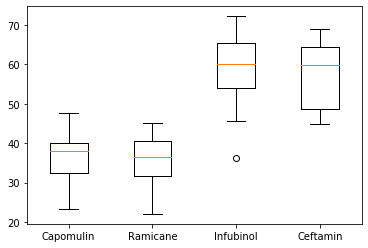

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_df = top_four.reset_index()
tumor_lists = plot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(treaments)
plt.boxplot(tumor_volume, labels=treaments)
plt.show()


## Line and Scatter Plots

In [77]:
#create Capomulin df - will only have mice that were treated with Capomulin
capomulin_df=clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin',:]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [81]:
#create df for one mouse, set mouse id as a variable so it is easy to change
x = 's185'
capomulin_mouse_df=capomulin_df.loc[capomulin_df['Mouse ID'] == x,:]
capomulin_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


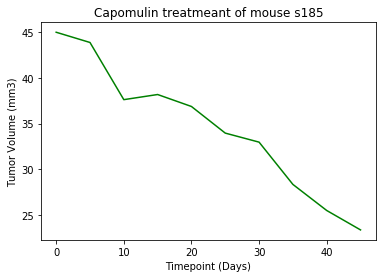

<Figure size 432x288 with 0 Axes>

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#x axis = time (independent) and y = tumor volume (dependent varaible)
plt.plot(capomulin_mouse_df['Timepoint'], capomulin_mouse_df['Tumor Volume (mm3)'],color="green")

#formatt chart 
plt.title('Capomulin treatmeant of mouse s185')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.savefig('linegraph_one')

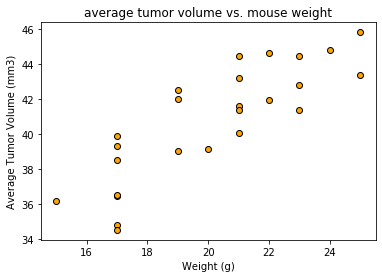

<Figure size 432x288 with 0 Axes>

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#get avg to use to plot - using mean()
avg = capomulin_df.groupby(['Mouse ID']).mean()
#x axis = weight (independent variable) and y = tumor volume (dependent variable)
plt.scatter(avg['Weight (g)'], avg['Tumor Volume (mm3)'], marker="o", facecolors="orange", edgecolors="black")
plt.title('average tumor volume vs. mouse weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.savefig('scatterplot')

## Correlation and Regression

In [104]:
# Calculate the correlation coefficient and linear regression model 
#correlation coefficient - using wight and avg wol
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(avg['Weight (g)'], avg['Tumor Volume (mm3)'])[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [111]:
# Perform a linear regression on mouse weight and average tumor volume for the Capomulin regimen
lin_reg = tv_slope, tv_int, tv_r, tv_p, tv_std_err=st.linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
lin_reg

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [113]:
# Create equation of line to calculate predicted mouse weight and average tumor volume for the Capomulin regimen(line of best fit)
weight = avg['Weight (g)']
tv_fit = tv_slope * weight + tv_int

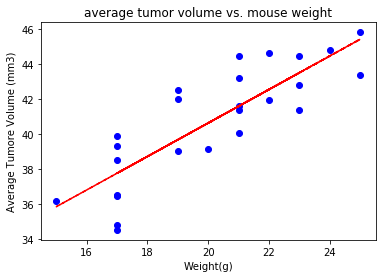

<Figure size 432x288 with 0 Axes>

In [121]:
# Plot the linear model on top of scatter plot 
plt.scatter(avg['Weight (g)'], avg['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(weight,tv_fit,"--",color="red")
plt.title('average tumor volume vs. mouse weight')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()
plt.savefig('linearmodel')